V723 Cas lightcurve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

#defing frequency 5
f5 = (	 
[50430, 	5.0,	2.3,	0.5],	

[50473, 	5.0,	2.4,	0.4],	

[50876, 	5.0,	7.0,	0.2],		

[51154, 	5.0,	8.2,	0.5],	

[51601,	5.0,	7.9,	0.4],

[51650,	5.0,	13.5,	0.9],

[51938,	5.0,	6.3,	1.1],
     
[52063,	5.0,	4.0,	0.7],

[52208,	5.0,	5.4,	0.3],
)

#defining frequency 1.66
f1_66 = ([50909,	1.66,	4.3,	0.3],)


#making the dataframes fro both frequencies
df5 =  pd.DataFrame(f5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)"])

df1_66 =  pd.DataFrame(f1_66, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)"])

In [3]:
#defining/making the days, flux and error in flux for each frequency 
#the days is found by the MJdate in the data - MJdate of the beginibg of the eruption (Aug 24th 1995)
days5 = df5['MJD']-49953
flux5 = df5["Flux (mJy)"]
flux_err5 = np.sqrt(df5["eFlux (mJy)"]**2 + (df5["Flux (mJy)"]*0.05)**2)

days1_66 = df1_66['MJD']-49953
flux1_66 = df1_66["Flux (mJy)"]
flux_err1_66 = np.sqrt(df1_66["eFlux (mJy)"]**2 + (df1_66["Flux (mJy)"]*0.05)**2)

In [4]:
print(flux_err5)

0    0.513055
1    0.417612
2    0.403113
3    0.646607
4    0.562161
5    1.125000
6    1.144214
7    0.728011
8    0.403609
dtype: float64


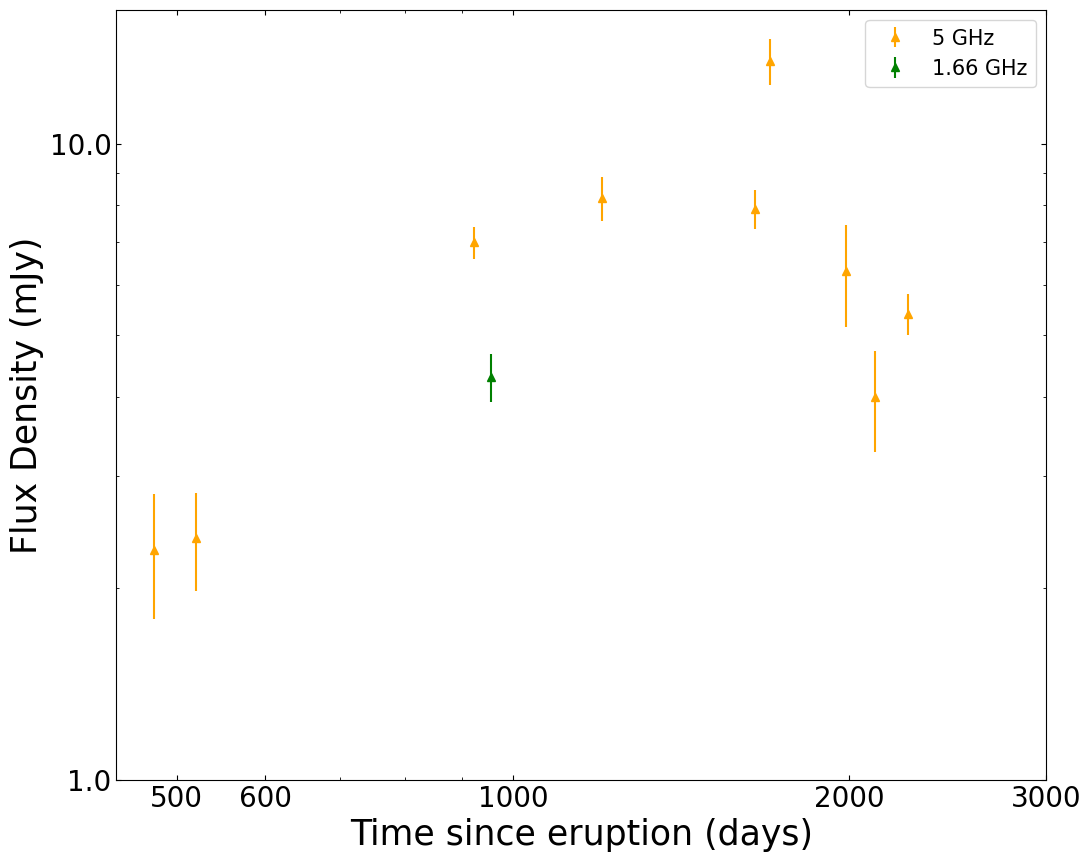

In [5]:
#defining the figure and fig size
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

# Store which labels have already been used
used_labels = set()

#function to sort the non-detections vs the detections
def plot(days, fluxes, errors, color, label_name):
    for day, flux, err in zip(days, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections

            ax.errorbar(day, (flux+err*3), fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, flux, yerr=err, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)

# Plot each band
plot(days5, flux5, flux_err5, 'orange', '5 GHz')
plot(days1_66, flux1_66, flux_err1_66, 'green', '1.66 GHz')

#Final plot formatting
ax.set_xscale('log')
ax.set_xticks([500,600,1000,2000,3000], labels = ['500','600','1000', '2000', '3000'], fontsize = 20)
ax.set_yscale('log')
ax.set_yticks([1,10], labels = ['1.0','10.0'], fontsize = 20)
ax.set_xlabel("Time since eruption (days)", fontsize =25)
ax.set_ylabel("Flux Density (mJy)", fontsize = 25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(fontsize = 15)
plt.savefig("V723_lc.png")
plt.show()

In [70]:
v723_opt_unfiltered_2 = pd.read_fwf(  'v723cas_strope.dat',
    skiprows=19,  # skip all header lines until the actual data starts
    infer_nrows=400,
    names=['Nova', 'JD', 'T', 'Vmag', 'e_Vmag', 'o_Vmag'])

v723_opt_unfiltered_2

,Nova,JD,T,Vmag,e_Vmag,o_Vmag
V723,Cas,2449956.25,0.25,9.28,0.11,4
V723,Cas,2449956.75,0.75,9.10,0.15,1
V723,Cas,2449957.25,1.25,9.08,0.07,13
V723,Cas,2449957.75,1.75,8.88,0.06,6
V723,Cas,2449958.25,2.25,9.05,0.05,13
...,...,...,...,...,...,...
V723,Cas,2453190.00,3234.00,14.93,0.05,34
V723,Cas,2453254.00,3298.00,15.18,0.04,154
V723,Cas,2453318.00,3362.00,14.94,0.04,97
V723,Cas,2453382.00,3426.00,14.73,0.03,64


In [73]:
#MJD/t0 = 49953
#JD = 2449953

opticaldays2 = ((v723_opt_unfiltered_2['JD']) - 2449953)
vmag2 = v723_opt_unfiltered_2['Vmag']
error_vmag2 = v723_opt_unfiltered_2['e_Vmag']

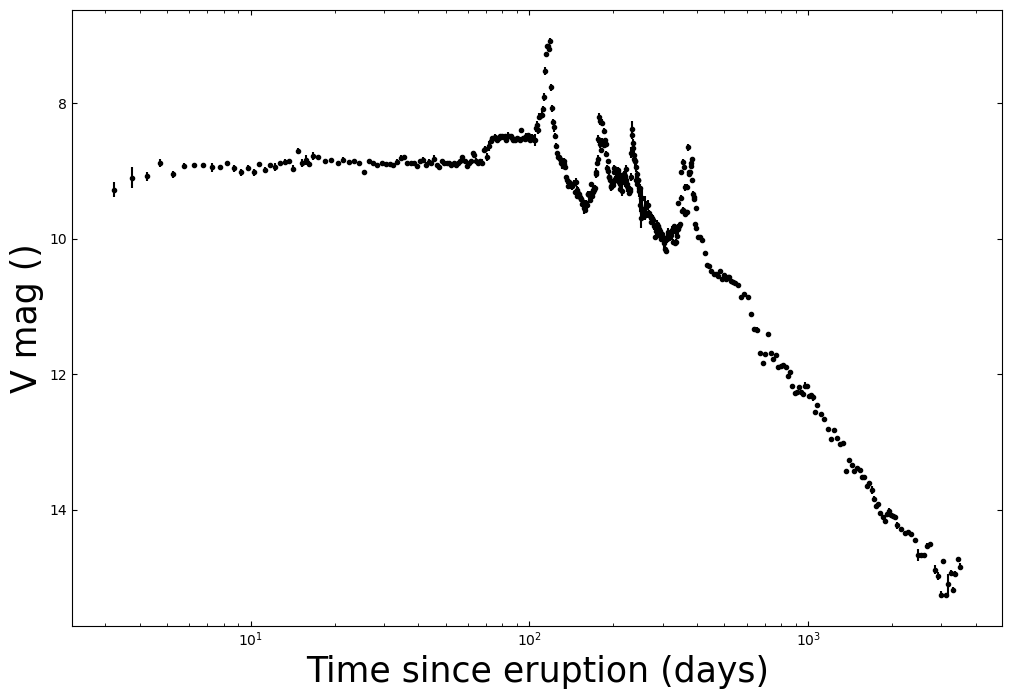

In [74]:
fig, ax = plt.subplots()

fig.set_size_inches(12,8)

ax.errorbar(opticaldays2, vmag2, yerr=error_vmag2, fmt='.', color='black')

ax.set_xscale('log')
#ax.set_xticks([1, 10,20,40,60,100, 200], labels = ['1','10','20', '40', '60','100', '200'], fontsize = 20)
#ax.set_yscale('log')
#ax.set_yticks([0.1,1], labels = [r], fontsize = 20)
ax.invert_yaxis()
ax.set_xlabel("Time since eruption (days)", fontsize = 25)
ax.set_ylabel("V mag ()", fontsize = 25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.show();

In [75]:
v723_opt_unflitered = pd.read_csv('aavsodata_690fc193aaf79.txt', header = 0)

#now to get only the vband

column_name = 'Band'
key = 'V'

v723_opt_kinda = v723_opt_unflitered[v723_opt_unflitered[column_name].str.contains(key, na=False)]

v723_opt_close = v723_opt_kinda[~v723_opt_kinda[column_name].str.contains('Vis.|CV', na=False)]

v723_opt =  v723_opt_close[~v723_opt_kinda["Magnitude"].str.contains('<9.1', na=False)]

v723_opt

C:\Users\wilhe\AppData\Local\Temp\ipykernel_25196\328455104.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v723_opt =  v723_opt_close[~v723_opt_kinda["Magnitude"].str.contains('<9.1', na=False)]


,JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,...,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit
49,2.449959e+06,8.84,NaN,NaN,V,ZRE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN
81,2.449960e+06,8.84,NaN,NaN,V,ZRE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN
232,2.449964e+06,8.74,NaN,NaN,V,ZRE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN
274,2.449965e+06,8.74,NaN,NaN,V,ZRE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN
314,2.449966e+06,8.73,NaN,NaN,V,ZRE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15244,2.451581e+06,14.01,NaN,NaN,V,ZRE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN
15263,2.451588e+06,13.4,NaN,NaN,V,OCN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN
15270,2.451595e+06,13.9,NaN,NaN,V,OCN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN
15277,2.451598e+06,13.50,NaN,NaN,V,ZRE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,V723 CAS,NaN,STD,NaN,NaN,NaN,NaN


In [76]:
#MJD/t0 = 49953
#JD = 2449953

opticaldays = ((v723_opt['JD'].astype(float)) - 2449953)
vmag = v723_opt['Magnitude'].astype(float)
error_vmag = v723_opt['Uncertainty'].astype(float)

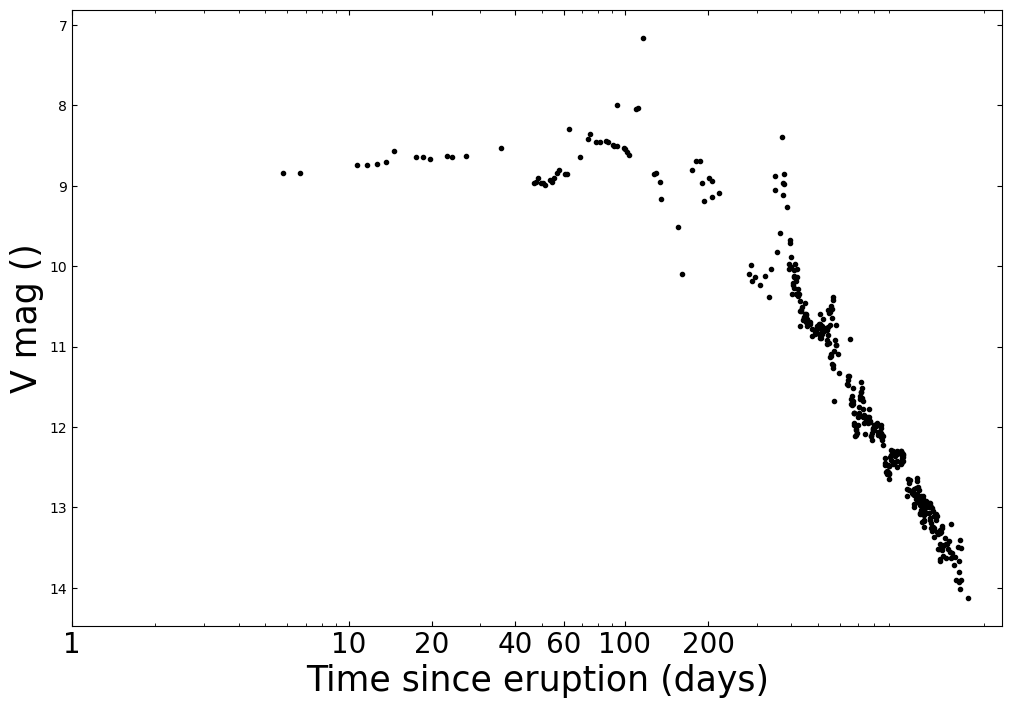

In [77]:
fig, ax = plt.subplots()

fig.set_size_inches(12,8)

ax.errorbar(opticaldays, vmag, yerr=error_vmag, fmt='.', color='black')

ax.set_xscale('log')
ax.set_xticks([1, 10,20,40,60,100, 200], labels = ['1','10','20', '40', '60','100', '200'], fontsize = 20)
#ax.set_yscale('log')
#ax.set_yticks([0.1,1], labels = [r], fontsize = 20)
ax.invert_yaxis()
ax.set_xlabel("Time since eruption (days)", fontsize = 25)
ax.set_ylabel("V mag ()", fontsize = 25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.show();

In [78]:
#detection lines 


mask0 =  df5['Flux (mJy)'] > 3 * np.sqrt(df5["eFlux (mJy)"]**2 + (df5["Flux (mJy)"]*0.05)**2) #don't show the non-detections
days5d = df5['MJD'][mask0] - 49953
flux5d = df5["Flux (mJy)"][mask0]
flux_err5d = np.sqrt(df5["eFlux (mJy)"][mask0]**2 + (df5["Flux (mJy)"][mask0]*0.05)**2)

mask0 =  df1_66['Flux (mJy)'] > 3 * np.sqrt(df1_66["eFlux (mJy)"]**2 + (df1_66["Flux (mJy)"]*0.05)**2) #don't show the non-detections
days1_66d = df1_66['MJD'][mask0] - 49953
flux1_66d = df1_66["Flux (mJy)"][mask0]
flux_err1_66d = np.sqrt(df1_66["eFlux (mJy)"][mask0]**2 + (df1_66["Flux (mJy)"][mask0]*0.05)**2)




#non detection lines

mask0 =  df5['Flux (mJy)'] < 3 * np.sqrt(df5["eFlux (mJy)"]**2 + (df5["Flux (mJy)"]*0.05)**2) # show the non-detections only
days5nd = df5['MJD'][mask0] - 49953
flux5nd = df5["Flux (mJy)"][mask0]
flux_err5nd = np.sqrt(df5["eFlux (mJy)"][mask0]**2 + (df5["Flux (mJy)"][mask0]*0.05)**2)

mask0 =  df1_66['Flux (mJy)'] < 3 * np.sqrt(df1_66["eFlux (mJy)"]**2 + (df1_66["Flux (mJy)"]*0.05)**2) # show the non-detections only
days1_66nd = df1_66['MJD'][mask0] - 49953
flux1_66nd = df1_66["Flux (mJy)"][mask0]
flux_err1_66nd = np.sqrt(df1_66["eFlux (mJy)"][mask0]**2 + (df1_66["Flux (mJy)"][mask0]*0.05)**2)

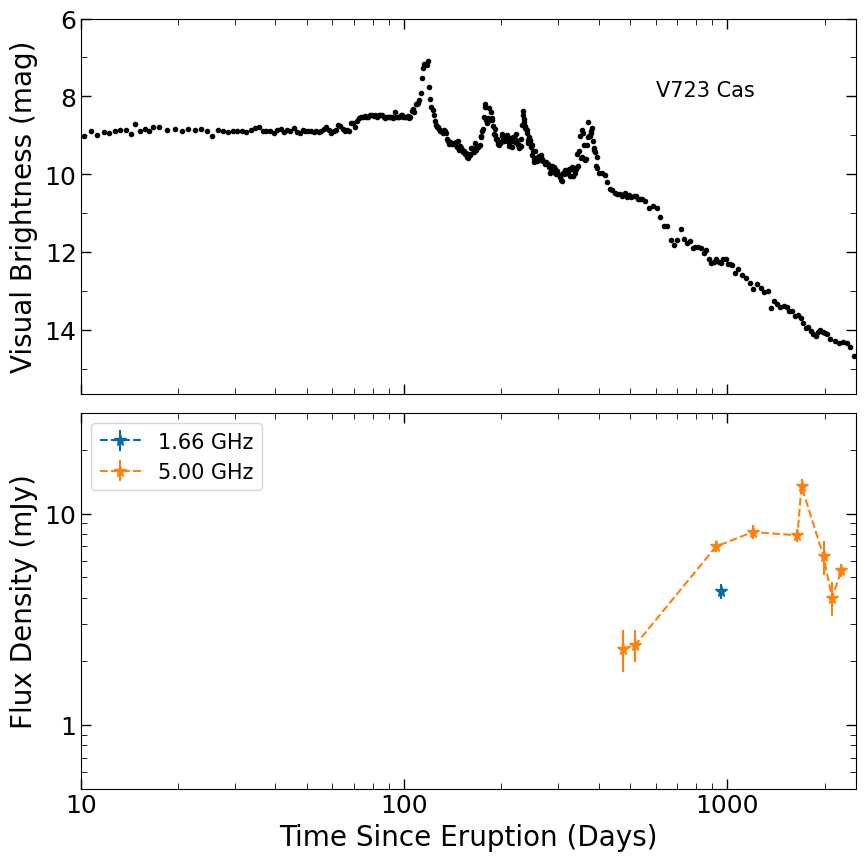

In [80]:
plt.style.use('tableau-colorblind10')

from matplotlib.ticker import AutoMinorLocator

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharey=False, sharex = True)#, constrained_layout=True)


#first the visual
axs[0].scatter(opticaldays2, vmag2, marker = '.', color = 'black')
axs[0].annotate('V723 Cas',(600,8), fontsize=15)

axs[0].set_xscale('log')
#axs[0].set_yscale('log')

axs[0].set_ylabel('Visual Brightness (mag)',fontsize =20)

axs[0].set_yticks([6,8,10,12,14], labels = [r'$6$',r'$8$',r'$10$', r'$12$', r'$14$'], fontsize = 18)
axs[0].invert_yaxis()
axs[0].tick_params(which='minor', length=4, direction = 'in', top=True, labeltop=False, left=True, labelleft=False, bottom=True, labelbottom=False, right = True,labelright = False)
axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))  # 2 minor intervals between major ticks
axs[0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=False, right = True, labelright = False)


#now the radio
axs[1].set_ylabel('Flux Density (mJy)',fontsize=20)
axs[1].set_xlabel('Time Since Eruption (Days)', fontsize=20)
axs[1].set_xscale('log')
axs[1].set_yscale('log')



axs[1].errorbar(days1_66d, flux1_66d, yerr=flux_err1_66d, linestyle ='--', fmt = '*' , markersize = 8.5, label='1.66 GHz')
axs[1].errorbar(days5d, flux5d, yerr=flux_err5d, linestyle ='--', fmt = '*', markersize = 8.5, label='5.00 GHz')



axs[1].scatter(days1_66nd, flux1_66nd , marker = 'v')
axs[1].scatter(days5nd, flux5nd , marker = 'v')




axs[1].legend(fontsize=15)

axs[1].set_xticks([1, 10,100, 1000], labels = ['1', '10','100',  '1000'], fontsize = 18)
axs[1].set_yticks([1, 10], labels = [r'$1$', r'$10$'], fontsize = 18)
axs[1].set_ylim(bottom=.5, top=30)
axs[1].set_xlim(left=10, right=2500)

axs[1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
axs[1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)


fig.subplots_adjust(hspace=0.05)
plt.savefig("V723_Optical_and_Radio_lightcurves.png")
plt.show();